In [65]:
import sys
sys.path.append('sources')

# CPI to MDP Pipeline

This notebook demonstrates how to convert a Control Process Interface (CPI) dictionary 
into a Markov Decision Process (MDP) format suitable for the PRISM model checker. We'll walk through:

1. Loading and examining a CPI dictionary
2. Understanding the conversion process
3. Generating PRISM code

In [66]:
import json

FILE = "test0"

# Load example CPI dictionary
with open(f'CPIs/{FILE}.cpi', 'r') as f:
    cpi_dict = json.load(f)

## Process Visualization

The CPI dictionary can be visualized as a directed graph to better understand its structure. In this visualization:

- **Task nodes** show duration and impact values (cost, time, quality)
- **Nature nodes** display their probability values (e.g., "p=0.7")
- **Sequence nodes** connect components with "head" and "tail" edges
- **Parallel nodes** show concurrent branches with "first" and "second" edges
- **Choice nodes** represent decision points with "true" and "false" branches

Each node type is represented as a box, with edges showing the relationships between components. This hierarchical representation helps understand the process flow and decision points in the system.

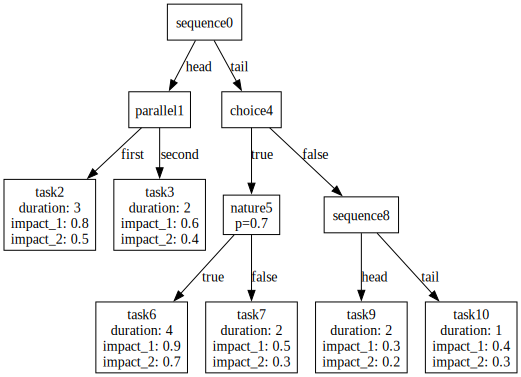

In [67]:
from process_visualization import process_to_dot
from IPython.display import display
from graphviz import Source

dot_graph = process_to_dot(cpi_dict)

src = Source(dot_graph)
display(src)

In [68]:
from etl import cpi_to_model
from prism import run_prism_analysis
from mdp_visualization import show_dot_model

cpi_to_model(FILE)
#run_prism_analysis(FILE)
#show_dot_model(FILE)

Successfully converted CPIs\test5.cpi to models\test5.nm


'models\\test5.nm'

In [69]:
from sampler import sample_expected_impact
from bounds import generate_multi_rewards_requirement

B = sample_expected_impact(cpi_dict)
#B['impact_1']= 2.09
B

{'impact_2': 1.48, 'impact_1': 2.1799999999999997}

In [70]:
from analysis import analyze_bounds

r  = analyze_bounds(FILE, B)
r['result']

pctl_path:  models\test5.pctl
model_path:  models\test5.nm
['C:\\Users\\danie\\Projects\\GitHub\\cpi-to-prism-loops\\prism-4.8.1-linux64-x86\\bin\\prism', '-cuddmaxmem', '10g', '-javamaxmem', '2g', 'C:\\Users\\danie\\Projects\\GitHub\\cpi-to-prism-loops\\models\\test5.nm', 'C:\\Users\\danie\\Projects\\GitHub\\cpi-to-prism-loops\\models\\test5.pctl', '-verbose']


In [71]:
r

{'command': 'C:\\Users\\danie\\Projects\\GitHub\\cpi-to-prism-loops\\prism-4.8.1-linux64-x86\\bin\\prism -cuddmaxmem 10g -javamaxmem 2g C:\\Users\\danie\\Projects\\GitHub\\cpi-to-prism-loops\\models\\test5.nm C:\\Users\\danie\\Projects\\GitHub\\cpi-to-prism-loops\\models\\test5.pctl -verbose',
 'error': "[WinError 193] %1 non è un'applicazione di Win32 valida",
 'return_code': -1,
 'result': None,
 'model_info': {},
 'timings': {},
 'states_info': {},
 'warnings': [],
 'property': 'multi(R{"impact_1"}<=2.180000 [C], R{"impact_2"}<=1.480000 [C])'}

In [72]:
print(r['prism_output'])

KeyError: 'prism_output'

In [ ]:
from refinements import refine_bounds
#refine_bounds('test8', 10, verbose=True)

In [ ]:
from read import read_cpi_bundles

d = read_cpi_bundles(x=2,y=3)[3000]

In [ ]:
d.pop('metadata')

In [ ]:
from benchmark import run_benchmarks
#run_random_benchmark()